# **Logistic Regression**

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
titanic_data = pd.read_csv('/content/drive/My Drive/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

In [4]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
titanic_data.drop(columns = ['Cabin', 'PassengerId', 'Ticket', 'Name', 'SibSp', 'Parch'], axis = 1, inplace = True)
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [0]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df = titanic_data['Sex', 'Embarked']
#df = le.fit_transform(df)
#titanic_data

In [7]:
titanic_data = pd.get_dummies(titanic_data, columns = ['Sex', 'Embarked'])
titanic_data.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1


In [8]:
import matplotlib.pyplot as plt
correl = titanic_data.corr()
correl

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
Fare,0.257307,-0.549500,0.096067,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.093254,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.093254,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.036261,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.022405,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.032523,-0.166603,-0.125722,0.125722,-0.778359,-0.496624,1.000000


In [9]:
from sklearn.impute import SimpleImputer
ages = titanic_data.drop(["Age"], axis = 1)
imputer = SimpleImputer(strategy = 'mean')

imputer.fit(ages)
trans = imputer.transform(ages)
titanic_data = pd.DataFrame(trans, columns = ages.columns)
print(titanic_data.isna().sum())

Survived      0
Pclass        0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [10]:
target = titanic_data['Survived']
titanic_data.drop(['Survived'],axis =1, inplace = True)
titanic_data.head()

,Pclass,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_data, target, test_size = 0.2, random_state = 123)
print(x_train.shape)
print(x_test.shape)
titanic_data.dropna(axis = 1, inplace = True)

(712, 7)
(179, 7)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
lr = LogisticRegression(random_state = 1, max_iter = 10000)
lr.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pred = lr.predict(x_train)
acc = accuracy_score(y_train, pred)
print(np.round(acc*100, 2), '%')
predictions = lr.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

78.09 %
79.33 %


In [72]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve
confusion_matrix(y_train, pred)

array([[360,  75],
       [ 81, 196]])

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       435
         1.0       0.72      0.71      0.72       277

    accuracy                           0.78       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.78      0.78      0.78       712



In [0]:
fpr, tpr, thresholds = roc_curve(y_train, pred )
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--') 
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

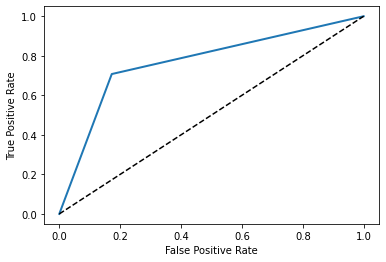

In [75]:
plot_roc_curve(fpr, tpr)


In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, pred)

0.7675837171666874

The roc_auc score should be ideally close to 1. This makes up as a very poor classifier.